In [1]:
import pymc as pm
import arviz as az

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.models.frequentist import *
from thesis_tools.utils.data import *

In [3]:
df = pd.DataFrame()
df['year'] = list(range(15))
df['group'] = 'Rotterdam'
df['alpha'] = 1.0
df['constant'] = 1
df['x_2'] = np.random.normal(0, 1, len(df))
df['x_3'] = np.random.normal(0, 1, len(df))
df['epsilon'] = np.random.normal(0, 0.1, len(df))

const_coef = 0
x_2_coef = 1
x_3_coef = 1

for i in range(1, len(df)):
    df.loc[i, 'alpha'] = df.loc[i-1, 'alpha']*np.exp(
        const_coef * df.loc[i, 'constant'] + x_2_coef * df.loc[i, 'x_2'] + x_3_coef * df.loc[i, 'x_3'] + df.loc[i, 'epsilon']
    )

def generate_random_y(row):
    alpha = row['alpha']
    return Weibull(gamma=0.25, alpha=alpha).sample(100)

df['y_data'] = df.apply(generate_random_y, axis=1)


In [4]:
df = read_panel_data(observations_threshold=50)
df = df[df['group'] == 'U.S.']
df = df.tail(15)

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_tools/utils/data.py:251: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_FTSE100['Date'] = pd.to_datetime(df_FTSE100['Date'])


In [5]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
112,U.S.,2008,48570.045980,4869.790039,6851.750000,5879.78,NaN,1486.400024,5137.450195,NaN,...,-0.141199,0.009184,-0.053528,NaN,-0.019322,NaN,NaN,-0.042388,0.453096,1
113,U.S.,2009,47194.943355,2973.919922,4338.350098,4149.64,NaN,838.799988,2874.800049,NaN,...,-0.493170,-0.457010,-0.348498,NaN,-0.572140,-0.580574,NaN,-0.512338,-0.789358,1
114,U.S.,2010,48650.643128,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,0.229060,0.256841,0.223427,NaN,0.288665,0.529582,NaN,0.262575,0.406572,1
115,U.S.,2011,50065.966504,4005.500000,7077.479980,5862.94,NaN,1331.699951,5505.899902,NaN,...,0.068727,0.232583,0.122203,NaN,0.173574,0.120255,NaN,0.180361,-0.068746,1
116,U.S.,2012,51784.418574,3298.550049,6458.910156,5681.61,NaN,1273.699951,5199.250000,NaN,...,-0.194185,-0.091457,-0.031417,NaN,-0.044530,-0.057306,NaN,0.020235,-0.196599,1
117,U.S.,2013,53291.127689,3732.600098,7776.049805,6276.88,NaN,1416.800049,6034.750000,NaN,...,0.123622,0.185588,0.099638,NaN,0.106475,0.149020,NaN,0.132339,0.039685,1
118,U.S.,2014,55123.849787,4165.720215,9306.480469,6510.44,1454.050049,1598.500000,6089.500000,NaN,...,0.109784,0.179663,0.036534,NaN,0.120665,0.009032,NaN,0.173863,-0.159823,1
119,U.S.,2015,56762.729452,4604.250000,10694.320313,6749.40,1647.689941,1677.500000,8808.900391,1506.40,...,0.100091,0.139002,0.036047,0.125021,0.048239,0.369197,NaN,0.112572,0.456831,1
120,U.S.,2016,57866.744934,4417.020020,9798.110352,6083.79,1784.920044,1562.199951,7563.549805,1472.30,...,-0.041515,-0.087523,-0.103826,0.079999,-0.071210,-0.152422,-0.022897,-0.027827,-0.159302,1
121,U.S.,2017,59907.754261,4748.899902,11535.309570,7099.15,2217.389893,1805.500000,8561.299805,1493.35,...,0.072448,0.163223,0.154347,0.216957,0.144743,0.123911,0.014196,0.160868,0.143226,1


In [6]:
df.columns

Index(['group', 'year', 'gdp_pc', 'CAC40', 'DAX', 'FTSE100', 'MOEX', 'MSCI',
       'NIFTY', 'OMX40', 'SPX', 'SSE', 'net_worth', 'N_net_worth',
       'log_change_gdp_pc', 'log_change_CAC40', 'log_change_DAX',
       'log_change_FTSE100', 'log_change_MOEX', 'log_change_MSCI',
       'log_change_NIFTY', 'log_change_OMX40', 'log_change_SPX',
       'log_change_SSE', 'constant'],
      dtype='object')

In [7]:
df = df.set_index('year')

In [8]:
# model = pm.Model()

# y_column = 'net_worth'
# covariate_names = ['constant', 'log_change_gdp_pc', 'log_change_SPX']

# y_column = 'y_data'
# covariate_names = ['constant', 'x_2', 'x_3']

# with model:    
#     betas = []
#     for cov in covariate_names:
#         beta_variance = pm.Gamma(f'beta_variance_{cov}', alpha=1, beta=1)
#         betas.append(pm.Normal(f'beta_{cov}', mu=0, sigma=beta_variance))

#     years = df.index.values
#     X = df[covariate_names]

#     alpha_pymc = pm.InverseGamma(f'alpha_pymc_{years[0]}', alpha=1, beta=1)
#     gamma = pm.Deterministic('gamma', alpha_pymc) 
#     alphas_pymc = {years[0]: alpha_pymc}
#     for year in years[1:]:
#         alphas_pymc[year] = pm.Deterministic(
#             f'alpha_pymc_{year}', 
#             alpha_pymc
#         )

#     initial_beta_pymc = pm.Gamma(f'beta_pymc_{years[0]}', alpha=1, beta=1)
#     betas_pymc = {years[0]: initial_beta_pymc}
#     initial_alpha = pm.Deterministic(
#         f'alpha_{years[0]}', 
#         initial_beta_pymc ** alpha_pymc / alpha_pymc
#     )
#     alphas = {years[0]: initial_alpha}

#     epsilon_sigma = pm.Gamma('epsilon_sigma', alpha=1, beta=1)
#     for year in years[1:]:
#         epsilon = pm.Normal(f'epsilon_{year}', mu=0, sigma=epsilon_sigma)
#         beta_pymc = pm.Deterministic(
#             f'beta_pymc_{year}', 
#             betas_pymc[year-1]*pm.math.exp(
#                 (pm.math.dot(X.loc[year], betas) + epsilon) / alpha_pymc
#             )
#         )
#         alpha = pm.Deterministic(f'alpha_{year}', beta_pymc ** alpha_pymc / alpha_pymc)
#         betas_pymc[year] = beta_pymc
#         alphas[year] = alpha

#     y_obs = []
#     for year in years:
#         y_non_truncated = pm.Weibull.dist(alpha=alphas_pymc[year], beta=betas_pymc[year])
#         y = pm.Truncated(
#                 f'y_{year}', 
#                 y_non_truncated, 
#                 lower=1.0,
#                 upper=None,
#                 observed=df.loc[year][y_column]
#             )
#         y_obs.append(y)

In [9]:
#New attempt with custom distribution

model = pm.Model()

y_column = 'net_worth'
covariate_names = ['constant', 'log_change_gdp_pc', 'log_change_SPX']

# y_column = 'y_data'
# covariate_names = ['constant', 'x_2', 'x_3']

with model:    
    betas = []
    for cov in covariate_names:
        beta_variance = pm.Gamma(f'beta_variance_{cov}', alpha=1, beta=1)
        betas.append(pm.Normal(f'beta_{cov}', mu=0, sigma=beta_variance))

    years = df.index.values
    X = df[covariate_names]

    gamma = pm.InverseGamma('gamma', alpha=1, beta=1)

    initial_alpha = pm.Gamma(f'alpha_{years[0]}', alpha=1, beta=1)
    alphas = {years[0]: initial_alpha}

    epsilon_sigma = pm.Gamma('epsilon_sigma', alpha=1, beta=1)
    for year in years[1:]:
        epsilon = pm.Normal(f'epsilon_{year}', mu=0, sigma=epsilon_sigma)
        alpha = pm.Deterministic(
            f'alpha_{year}', 
            alphas[year-1]*pm.math.exp(pm.math.dot(X.loc[year], betas) + epsilon)
        )
        alphas[year] = alpha
    
    # Functions for the custom distribution (trunctaed Weibull)
    def weibull_logp(value, gamma, alpha):
        return -np.log(alpha) + (gamma-1)*np.log(value) + (1-value**gamma)/(alpha*gamma)

    def weibull_random(gamma, alpha, rng=None, size=None):
        u = rng.uniform(size=size)
        return (1 - np.log(1 - u) * alpha * gamma)**(1 / gamma)

    y_obs = []
    for year in years:
        y_obs.append(
            pm.CustomDist(
                f'y_{year}', 
                gamma,
                alphas[year],
                logp=weibull_logp, 
                random=weibull_random,
                observed=df.loc[year][y_column]
            )
        )

In [10]:
with model:
    trace = pm.sample(2000, tune=2000, nuts_sampler='pymc', chains=4, cores=4, target_accept=0.975)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_variance_constant, beta_constant, beta_variance_log_change_gdp_pc, beta_log_change_gdp_pc, beta_variance_log_change_SPX, beta_log_change_SPX, gamma, alpha_2008, epsilon_sigma, epsilon_2009, epsilon_2010, epsilon_2011, epsilon_2012, epsilon_2013, epsilon_2014, epsilon_2015, epsilon_2016, epsilon_2017, epsilon_2018, epsilon_2019, epsilon_2020, epsilon_2021, epsilon_2022]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 627 seconds.
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.


/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (37), generating only 20 plots
  warnings.warn(


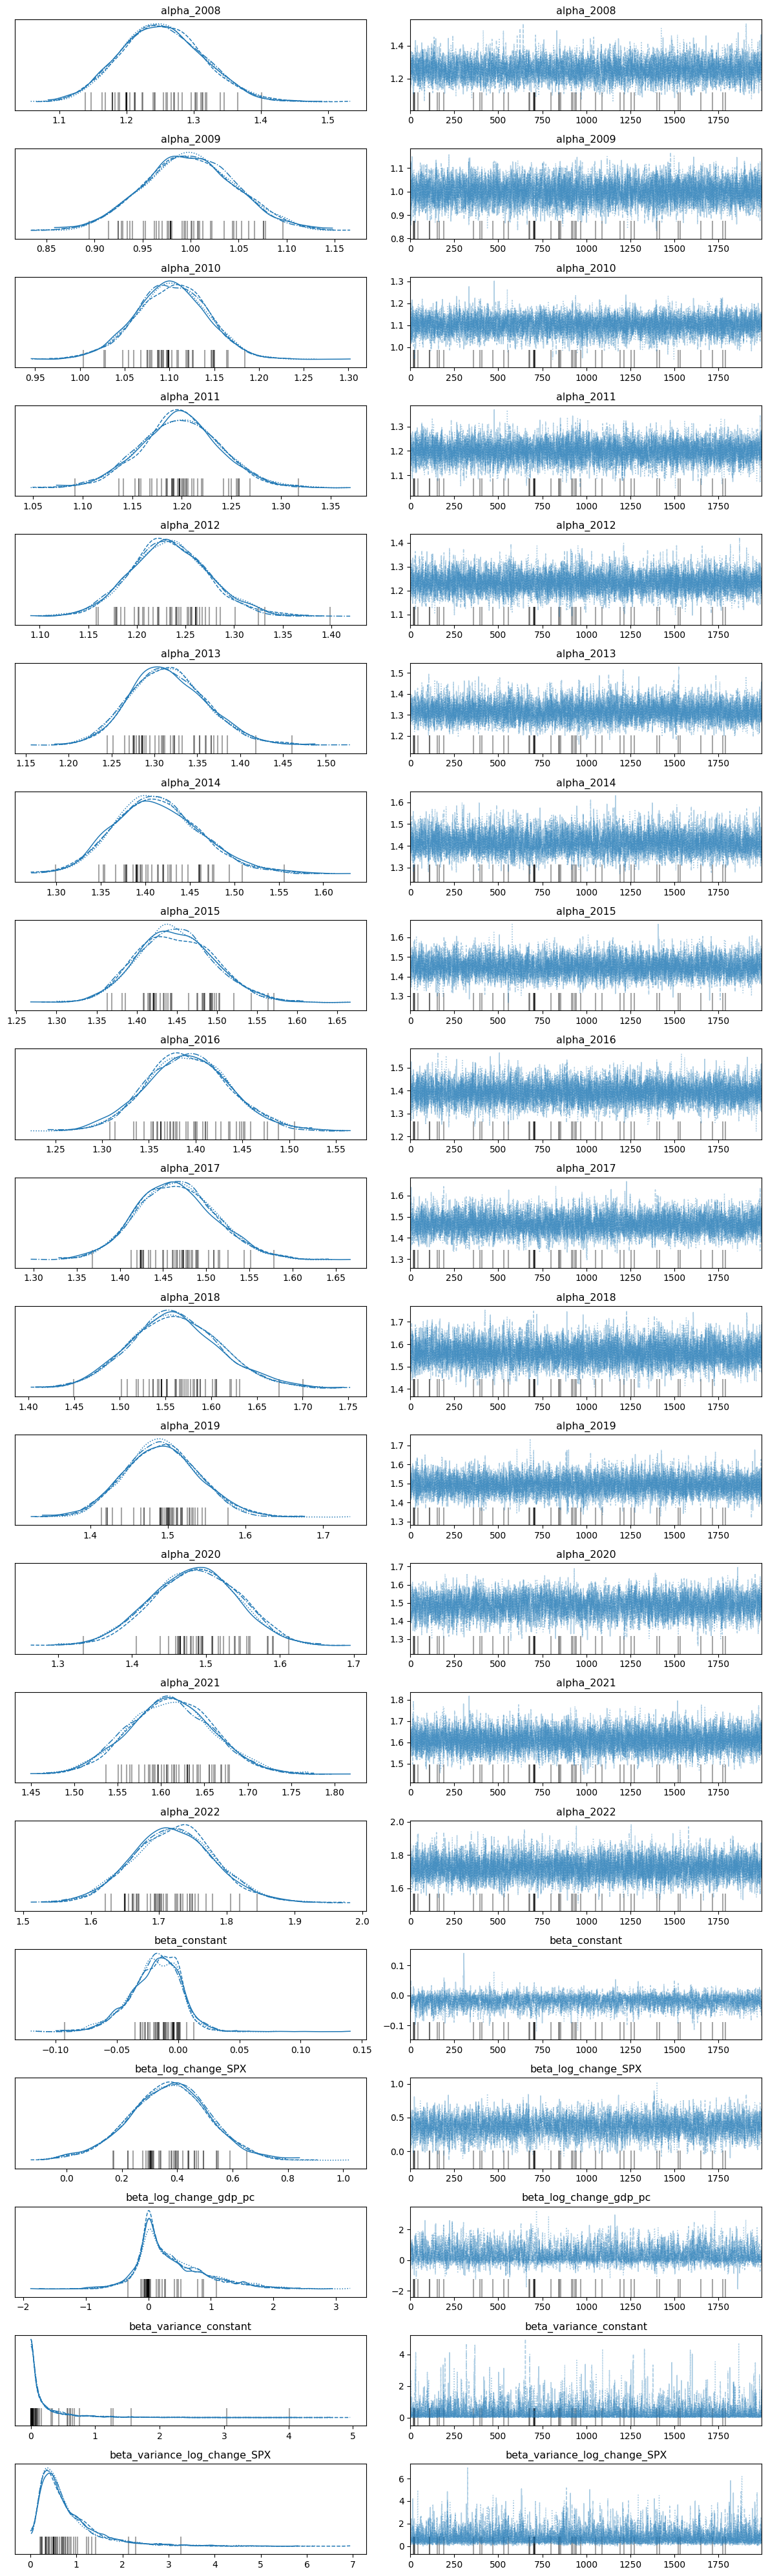

In [11]:
az.plot_trace(trace)
plt.tight_layout()

In [12]:
summary = az.summary(trace, stat_focus='median')
summary

,median,mad,eti_3%,eti_97%,mcse_median,ess_median,ess_tail,r_hat
alpha_2008,1.251,0.042,1.143,1.373,0.001,5444.560,5126.0,1.0
alpha_2009,0.998,0.032,0.911,1.092,0.001,6314.026,6411.0,1.0
alpha_2010,1.102,0.027,1.025,1.175,0.001,5885.186,6041.0,1.0
alpha_2011,1.198,0.027,1.122,1.276,0.001,6932.416,6781.0,1.0
alpha_2012,1.233,0.027,1.159,1.315,0.001,7647.252,5925.0,1.0
alpha_2013,1.314,0.030,1.238,1.406,0.001,6522.930,5921.0,1.0
alpha_2014,1.411,0.032,1.331,1.514,0.001,5601.838,5996.0,1.0
alpha_2015,1.447,0.033,1.365,1.543,0.001,7298.107,6791.0,1.0
alpha_2016,1.391,0.030,1.309,1.480,0.001,7878.057,6366.0,1.0
alpha_2017,1.464,0.031,1.384,1.555,0.001,6911.927,6690.0,1.0


In [13]:
with model:
    ppc = pm.sample_posterior_predictive(trace)

Sampling: [y_2008, y_2009, y_2010, y_2011, y_2012, y_2013, y_2014, y_2015, y_2016, y_2017, y_2018, y_2019, y_2020, y_2021, y_2022]


Output()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/plot_utils.py:272: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (7798) in plot_posterior, generating only 40 plots
  warnings.warn(


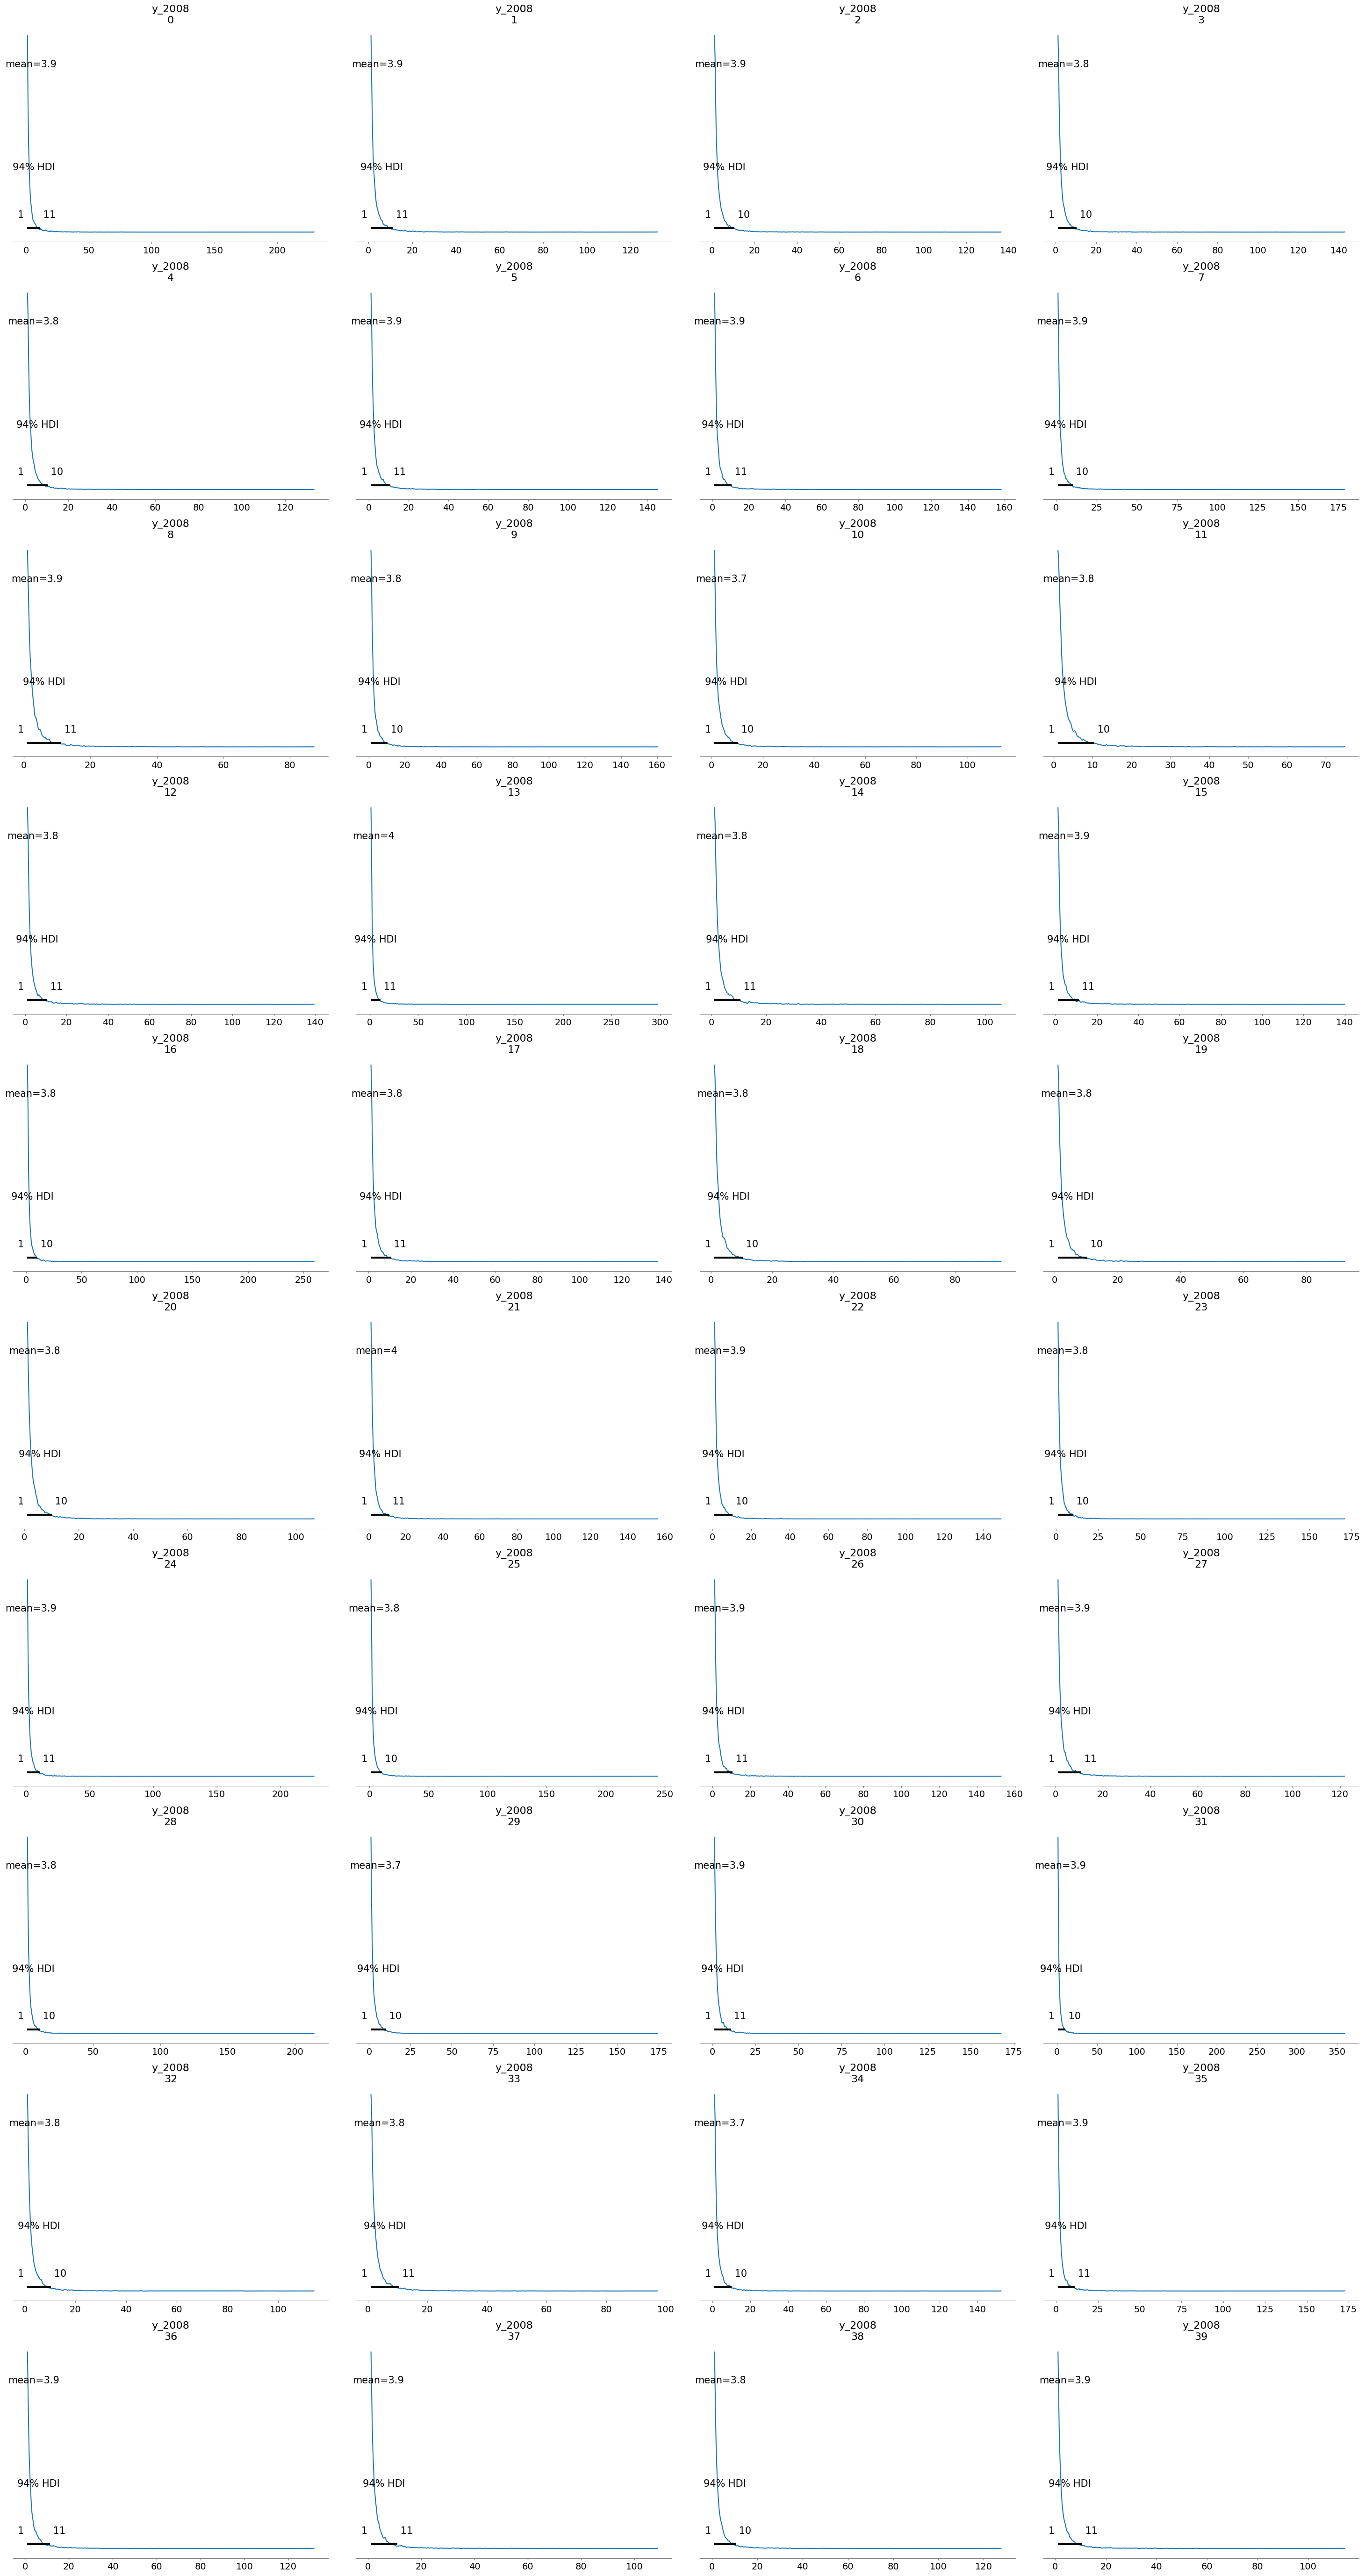

In [14]:
az.plot_posterior(ppc['posterior_predictive'])
plt.tight_layout()